In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
import sklearn
import tensorflow as tf

In [2]:
from sklearn.datasets import fetch_openml

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
mnist = fetch_openml('mnist_784')
mnist.data.shape, mnist.target.shape

((70000, 784), (70000,))

In [7]:
# 픽셀 하나 하나를 Input으로 보겠다.
X = mnist.data
Y = mnist.target

In [8]:
np.unique(Y, return_counts = True)

(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958],
       dtype=int64))

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

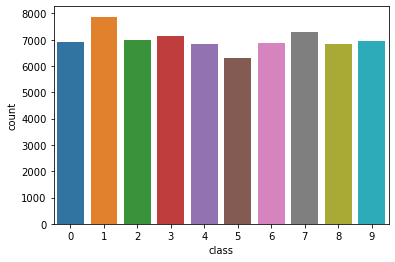

In [9]:
sns.countplot(Y)

In [10]:
random_seed = 20220517
random.seed = random_seed

np.random.seed = random_seed
#tf.random.set_seed(random_seed)

In [12]:
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, test_size = 0.2, random_state = random_seed )

In [11]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow.keras as keras


In [13]:
Train_Y = keras.utils.to_categorical(Train_Y, num_classes = 10)

In [14]:
scaler_X = MinMaxScaler()
scaler_X.fit(Train_X)
#Scaled_Test_X = scaler_X.transform(Test_X)

MinMaxScaler()

In [15]:
Scaled_Train_X = scaler_X.transform(Train_X)
Scaled_Test_X = scaler_X.transform(Test_X)

In [33]:
tf.random.set_seed(random_seed)
model = keras.Sequential()

model.add(keras.layers.Dense(units = 5, input_shape = (784, ), activation = 'sigmoid'))
model.add(keras.layers.Dense(units = 5, activation = 'sigmoid'))
model.add(keras.layers.Dense(units = 5, activation = 'sigmoid'))
model.add(keras.layers.Dense(units = 10, activation = 'softmax'))

In [34]:
_loss = tf.keras.losses.CategoricalCrossentropy() # 우리가 사용하던 binary cross entropy와 동일하다!

In [35]:
lr = 0.1
model.compile(loss = _loss,optimizer = keras.optimizers.SGD(learning_rate = lr))

In [50]:
history = model.fit(Scaled_Train_X, Train_Y, batch_size = 32, epochs = 30, shuffle = True, verbose = 2 ,validation_split = 0.2) 
# verbose=0,1,2중 선택
# validation_split -> validation 데이터의 비율을 결정

Epoch 1/30
1400/1400 - 1s - loss: 0.6439 - val_loss: 0.6484 - 1s/epoch - 935us/step
Epoch 2/30
1400/1400 - 1s - loss: 0.6299 - val_loss: 0.6521 - 1s/epoch - 933us/step
Epoch 3/30
1400/1400 - 1s - loss: 0.6180 - val_loss: 0.7121 - 1s/epoch - 953us/step
Epoch 4/30
1400/1400 - 1s - loss: 0.6045 - val_loss: 0.6337 - 1s/epoch - 948us/step
Epoch 5/30
1400/1400 - 1s - loss: 0.5964 - val_loss: 0.6231 - 1s/epoch - 932us/step
Epoch 6/30
1400/1400 - 1s - loss: 0.5872 - val_loss: 0.6228 - 1s/epoch - 937us/step
Epoch 7/30
1400/1400 - 1s - loss: 0.5799 - val_loss: 0.6293 - 1s/epoch - 957us/step
Epoch 8/30
1400/1400 - 1s - loss: 0.5730 - val_loss: 0.6113 - 1s/epoch - 929us/step
Epoch 9/30
1400/1400 - 1s - loss: 0.5668 - val_loss: 0.5950 - 1s/epoch - 929us/step
Epoch 10/30
1400/1400 - 1s - loss: 0.5599 - val_loss: 0.5988 - 1s/epoch - 960us/step
Epoch 11/30
1400/1400 - 1s - loss: 0.5534 - val_loss: 0.5869 - 1s/epoch - 962us/step
Epoch 12/30
1400/1400 - 1s - loss: 0.5468 - val_loss: 0.5996 - 1s/epoch - 

In [51]:
train_loss = history.history['loss']
vali_loss = history.history['val_loss']

In [52]:
epochs = range(1, len(train_loss)+1)

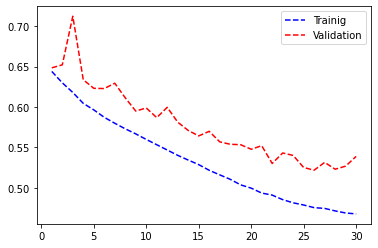

In [53]:
plt.plot(epochs, train_loss, '--b', label = 'Trainig')
plt.plot(epochs, vali_loss, '--r', label = 'Validation')
plt.legend()
plt.show()

In [54]:
pred = model.predict(Scaled_Test_X)

In [55]:
p = pred.argmax(axis = 1)

In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
Test_Y = Test_Y.astype(int)

In [58]:
print(confusion_matrix(y_true = Test_Y, y_pred = p , labels = [0,1,2,3,4,5,6,7,8,9]))

[[1287    2   40    2    7   17   26    4    1    0]
 [   1 1504    9    3    2    3    9    1   15    2]
 [  46    6 1143    8   22    6   66   22   77    2]
 [  23   11   33  883    0  288    5   30  162    9]
 [   3   18    3    0 1294    2   20    0    0   33]
 [  39   25   19   87   24 1055   31    4   16    5]
 [  17   13   24    0   17    8 1261    1    0    0]
 [   4    7   16    4   17    5    0 1249   18  103]
 [  10  168   45  108    6   17   22    7  969   11]
 [   6   13    9   18  160   19    1   48    8 1136]]


In [59]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(y_true = Test_Y, y_pred = p))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1386
           1       0.85      0.97      0.91      1549
           2       0.85      0.82      0.83      1398
           3       0.79      0.61      0.69      1444
           4       0.84      0.94      0.89      1373
           5       0.74      0.81      0.77      1305
           6       0.88      0.94      0.91      1341
           7       0.91      0.88      0.90      1423
           8       0.77      0.71      0.74      1363
           9       0.87      0.80      0.84      1418

    accuracy                           0.84     14000
   macro avg       0.84      0.84      0.84     14000
weighted avg       0.84      0.84      0.84     14000



----

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
lgr = LogisticRegression()